## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [2]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

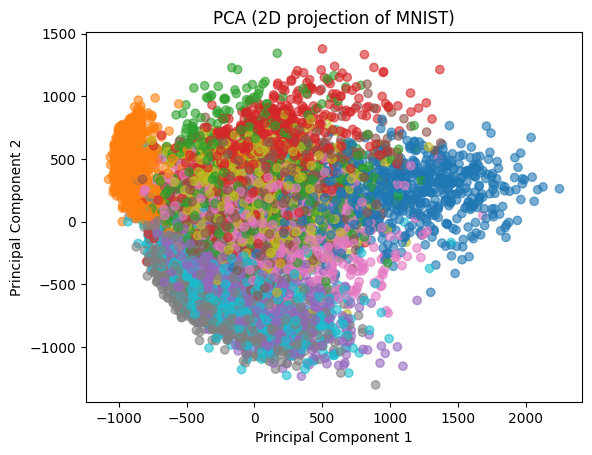

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_reduced = PCA(n_components=1).fit_transform(X)
X_reconstructed = PCA(n_components=1).fit(X).inverse_transform(X_reduced)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.title("PCA (2D projection of MNIST)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

    

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

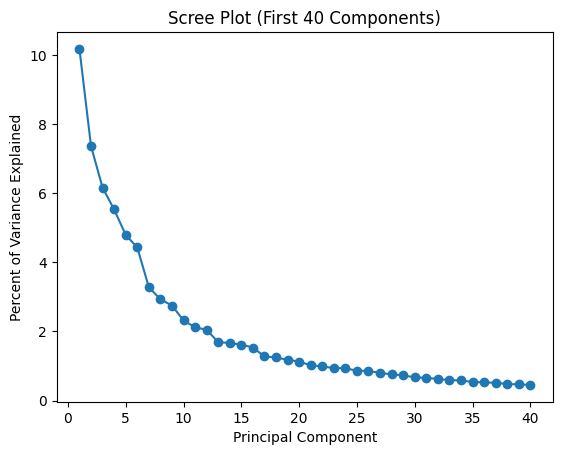

In [4]:
pca = PCA(n_components=40)
pca.fit(X)

plt.plot(range(1, 41), pca.explained_variance_ratio_ * 100, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Percent of Variance Explained")
plt.title("Scree Plot (First 40 Components)")
plt.show()

#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [5]:
pca = PCA().fit(X)

cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components_95 = (cumulative_variance < 0.95).sum() + 1

print("Number of components for 95% variance:", n_components_95)

Number of components for 95% variance: 149


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

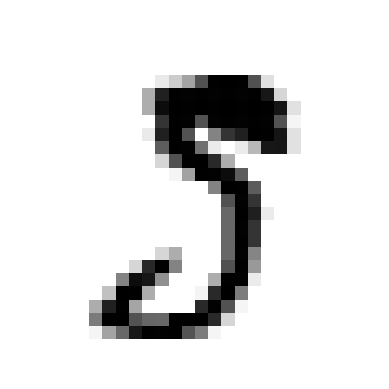

In [6]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

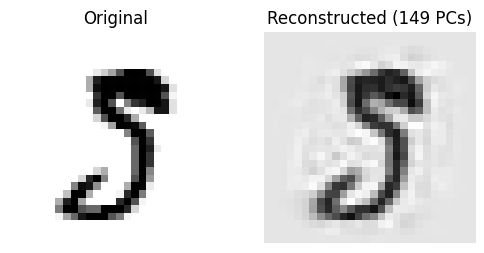

In [20]:
pca_95 = PCA(n_components=149)
X_train_pca95 = pca_95.fit_transform(X_mnist_train)
X_test_pca95 = pca_95.transform(X_mnist_test)

digit_reconstructed = pca_95.inverse_transform(X_train_pca95[0])

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(X_mnist_train[0].reshape(28, 28), cmap='binary')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(digit_reconstructed.reshape(28, 28), cmap='binary')
plt.title("Reconstructed (149 PCs)")
plt.axis("off")

plt.show()


### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [21]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_mnist_train, y_mnist_train)
acc_original = knn.score(X_mnist_test, y_mnist_test)


pca_80 = PCA(n_components=0.80)
X_train_pca80 = pca_80.fit_transform(X_mnist_train)
X_test_pca80 = pca_80.transform(X_mnist_test)

knn.fit(X_train_pca80, y_mnist_train)
acc_pca80 = knn.score(X_test_pca80, y_mnist_test)

print("Accuracy on original data:", acc_original)
print("Accuracy with PCA (80% variance):", acc_pca80)


Accuracy on original data: 0.9421428571428572
Accuracy with PCA (80% variance): 0.9528571428571428


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

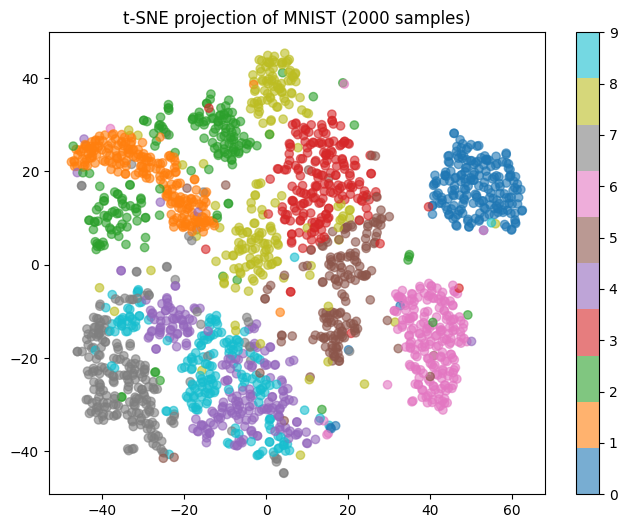

In [22]:
from sklearn.manifold import TSNE

X_subset = X_mnist_train[:2000]
y_subset = y_mnist_train[:2000]

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_subset)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', alpha=0.6)
plt.title("t-SNE projection of MNIST (2000 samples)")
plt.colorbar()
plt.show()

2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tsne, y_subset)
acc_tsne = knn.score(X_tsne, y_subset)

print("Accuracy with t-SNE features:", acc_tsne)


Accuracy with t-SNE features: 0.9265


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


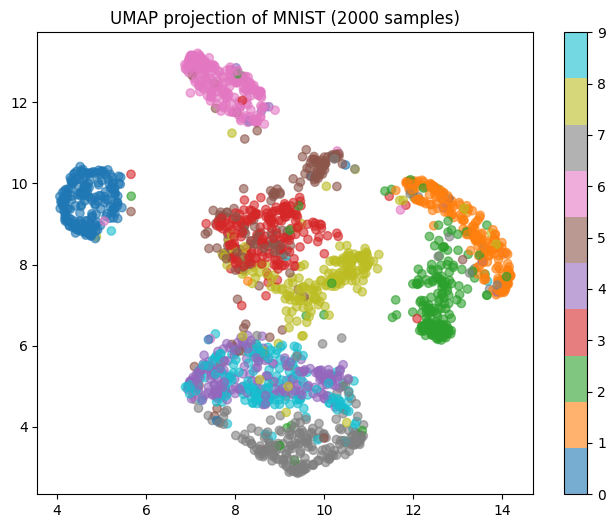

In [ ]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

# %pip install numpy==2.0
# %pip install umap-learn

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


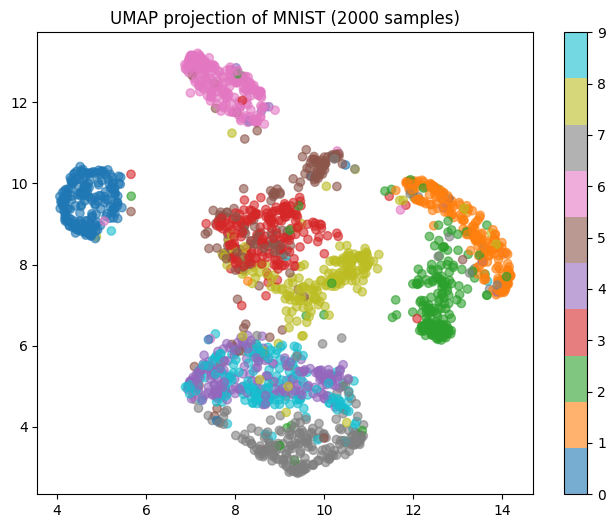

In [28]:
from umap import UMAP

X_subset = X_mnist_train[:2000]
y_subset = y_mnist_train[:2000]

umap_model = UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_subset)

plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_subset, cmap="tab10", alpha=0.6)
plt.title("UMAP projection of MNIST (2000 samples)")
plt.colorbar()
plt.show()

Now, calculate accuracy with KNN.

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_umap, y_subset)
acc_umap = knn.score(X_umap, y_subset)

print("Accuracy with UMAP features:", acc_umap)

Accuracy with UMAP features: 0.8505


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


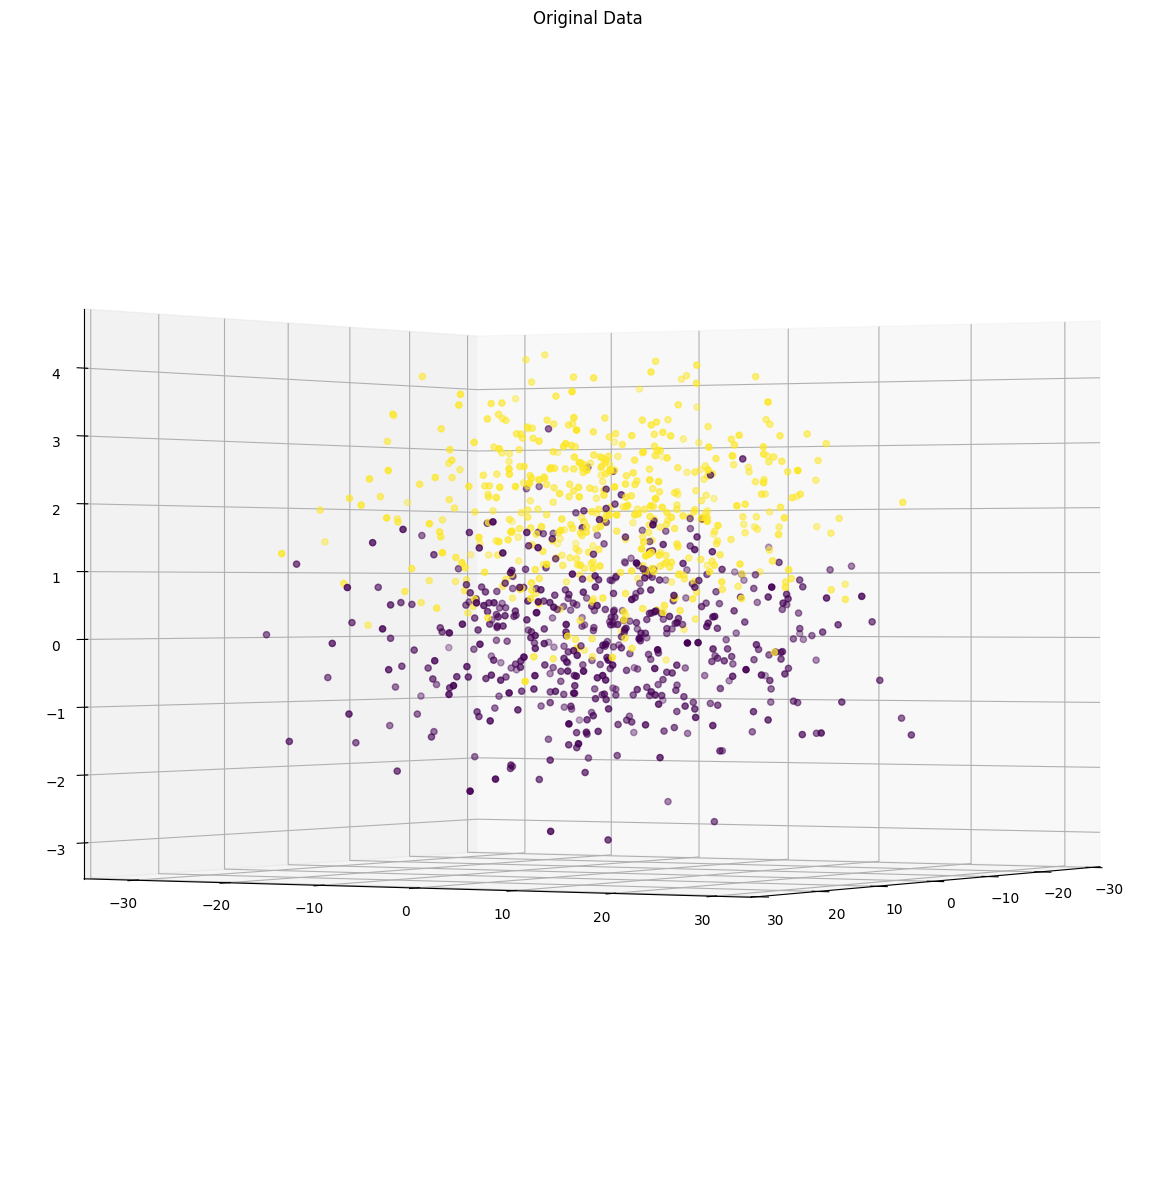

In [14]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [15]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

In [30]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

# Train KNN on PCA data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)
y_pred_pca = knn.predict(X_pca)

print("PCA (2D) KNN accuracy:", accuracy_score(y, y_pred_pca))


PCA (2D) KNN accuracy: 0.681


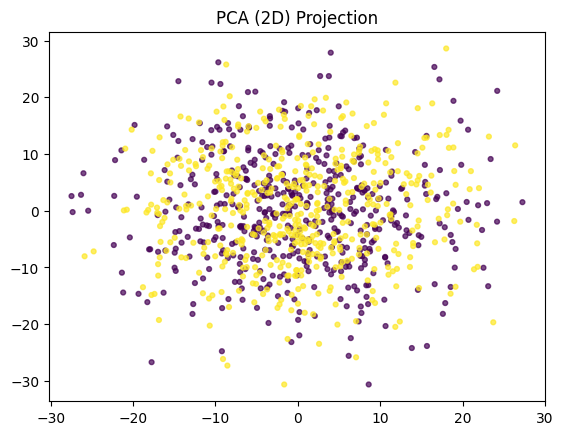

In [31]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", s=12, alpha=0.7)
plt.title("PCA (2D) Projection")
plt.show()


2. Try with UMAP.

In [33]:
umap_model = UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_umap, y)
y_pred_umap = knn.predict(X_umap)

print("UMAP (2D) KNN accuracy:", accuracy_score(y, y_pred_umap))

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (2D) KNN accuracy: 0.744


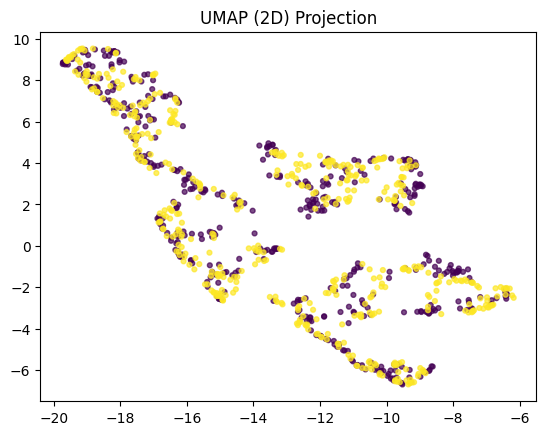

In [34]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap="viridis", s=12, alpha=0.7)
plt.title("UMAP (2D) Projection")
plt.show()

Explain your results in the cell below.  Which works better?  Why?

*UMAP works better, giving an accuracy of 0.744 compared to PCA’s 0.681. PCA is a linear method, so the classes overlapped a lot in 2D and KNN accuracy dropped. UMAP is non-linear and preserved local structures, creating clearer clusters and improving KNN performance.* 